In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("Netflix.csv")

I found this dataset on Kaggle (URL: https://www.kaggle.com/datasets/shivamb/netflix-shows) it is a fan favorite for data science projects and cinema enthusiasts like myself, so I decided this would be perfect to use. The file size is 1 MB and has 12 columns made up of 10 strings, 1 integer, and 1 date/time. I added a few columns for some particular visuals I wanted to create such as a time series bar chart which needed "year added" as a column. 


The column names and types are:



**show_id: s# of the row its in**

**type: Movie or TVShow**

**title: Title of Movie or TVShow**

**director: Director of Movie or TVShow**

**cast: Featured cast**

**country: Country of production**

**date_added: Date added to netflix**

**release_year: Year released**

**rating: Rating, i.e PG-13, R, etc.**

**duration: Duration**

**listed_in: What subjects you can find it in on Netflix**

**desctiption: Description of Movie or TVShow**


**And I added:**

**year_added: Year added to Netflix**

# Cleaning and EDA

In [7]:
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [8]:
clean_df = df.dropna()

In [9]:
clean_df.shape

(5332, 12)

In [10]:
clean_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# Scatter of Seasons vs Release Year

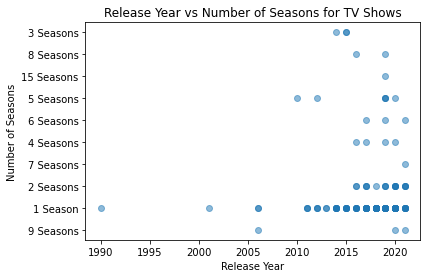

In [13]:
tv_shows = clean_df[clean_df['type'] == 'TV Show']
plt.scatter(tv_shows['release_year'], tv_shows['duration'], alpha=0.5)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.title('Release Year vs Number of Seasons for TV Shows')

# Show the plot
plt.show()

Time series charts are important in many ways, so incorporating historical trends is something anyone can find useful and a great reason I wanted to include it in the general public dataset.

# Pie Chart of Content

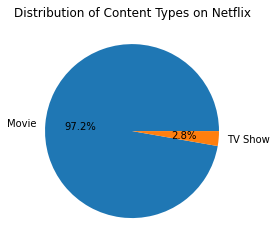

In [16]:
content_counts = clean_df.groupby("type").size()
plt.pie(content_counts, labels=content_counts.index, autopct="%1.1f%%") #adds an autopercentage, makes it more exact
plt.title("Distribution of Content Types on Netflix")
plt.show()

A simple yet effective way to view what types of content one can find on netflix.

# Heatmap Release Year vs Genre

In [18]:
new_df = clean_df[["release_year", "listed_in"]]
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
pivot_table = df.pivot_table(index='listed_in', columns='release_year', values='show_id', aggfunc='count', fill_value=0)


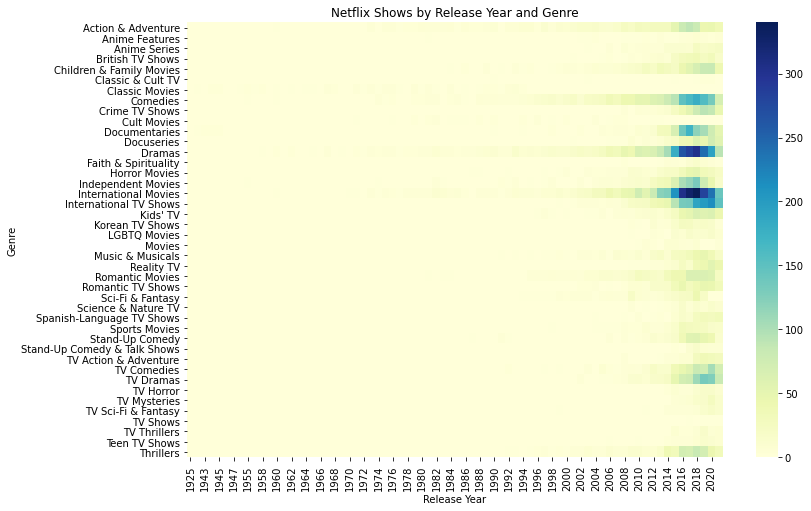

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Netflix Shows by Release Year and Genre')
plt.xlabel('Release Year')
plt.ylabel('Genre')


plt.show()

A beautiful heatmap that shows the evolution of genres over time, something anyone in the general public can read and find interesting. 